In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [44]:
data_file_name = 'data-v21-18-50-25-06-22'
df_dirty = pd.read_csv('data/'+ data_file_name +'.csv', encoding= 'ISO-8859-8')

# Remove outliers and remove nan functions:

In [45]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [46]:
def remove_nan_rows(data,col):
    data = data.dropna(subset = ['PPSQM'])
    return data

In [48]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36421 entries, 0 to 36420
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36421 non-null  int64  
 1   DealYear    36421 non-null  int64  
 2   DealMonth   36421 non-null  int64  
 3   Date        36421 non-null  object 
 4   Area        36421 non-null  object 
 5   Address     27880 non-null  object 
 6   Rooms       36416 non-null  float64
 7   Surface     36421 non-null  int64  
 8   Floor       22996 non-null  float64
 9   Price       36405 non-null  object 
 10  PPSQM       36263 non-null  object 
 11  BuildYear   36420 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 3.3+ MB


# Handling data types
## Creating a clean Data Frame by removing outliers and nan values

In [63]:
df_dirty = remove_nan_rows(df_dirty,'PPSQM')

#handle columns types
df_dirty['PPSQM'] = df_dirty['PPSQM'].astype(str).str.replace(',', '').astype(int)
df_dirty['DealYear'] = df_dirty['DealYear'].astype(int)
df_dirty['Price'] = df_dirty['Price'].astype(str).str.replace(',', '').astype(int)

areas = df_dirty.Area.unique()
df_clean= pd.DataFrame({'DealYear': [],'DealMonth': [],'Date': [],'Area':[],'Address': [],'Rooms':[],'Surface':[],
                        'Floor':[],'Price':[],'PPSQM':[],'BuildYear': []})

for area in areas:
    df_temp = df_dirty.loc[df_dirty['Area'] == area]
    df_temp = remove_outlier(df_temp,'PPSQM')
    df_clean = pd.concat([df_clean,df_temp],ignore_index=True)
    
df_dirty['PPSQM'] = df_dirty['PPSQM'].astype(str).str.replace(',', '').astype(int)

fileName = data_file_name + '_cleaned'
df_clean.to_csv('data/'+ fileName + '.csv', encoding = "ISO-8859-8")

# Showing the differences between a dirty Data Frame and a clean one

In [64]:
df_dirty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36263 entries, 1 to 36420
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  36263 non-null  int64  
 1   DealYear    36263 non-null  int32  
 2   DealMonth   36263 non-null  int64  
 3   Date        36263 non-null  object 
 4   Area        36263 non-null  object 
 5   Address     27768 non-null  object 
 6   Rooms       36258 non-null  float64
 7   Surface     36263 non-null  int64  
 8   Floor       22895 non-null  float64
 9   Price       36263 non-null  int32  
 10  PPSQM       36263 non-null  int32  
 11  BuildYear   36262 non-null  float64
dtypes: float64(3), int32(3), int64(3), object(3)
memory usage: 3.2+ MB


In [65]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34720 entries, 0 to 34719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DealYear    34720 non-null  float64
 1   DealMonth   34720 non-null  float64
 2   Date        34720 non-null  object 
 3   Area        34720 non-null  object 
 4   Address     26611 non-null  object 
 5   Rooms       34716 non-null  float64
 6   Surface     34720 non-null  float64
 7   Floor       22201 non-null  float64
 8   Price       34720 non-null  float64
 9   PPSQM       34720 non-null  float64
 10  BuildYear   34720 non-null  float64
 11  Unnamed: 0  34720 non-null  float64
dtypes: float64(9), object(3)
memory usage: 3.2+ MB


# Visualization of the outliers dropped

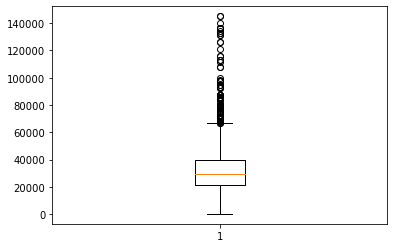

In [66]:
plt.boxplot(df_dirty.loc[df_dirty['Area'] == 'tel-aviv-area']['PPSQM'])
plt.show()

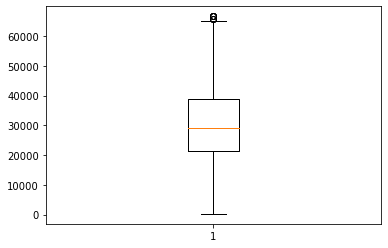

In [67]:
df_clea = df_clean.loc[df_clean['Area'] == 'tel-aviv-area']['PPSQM']
plt.boxplot(df_test)
plt.show()

## Before cleaning:

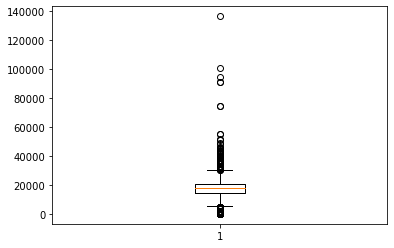

In [68]:
plt.boxplot(df_dirty.loc[df_dirty['Area'] == 'holon-bat-yam']['PPSQM'])
plt.show()

## After cleaining:

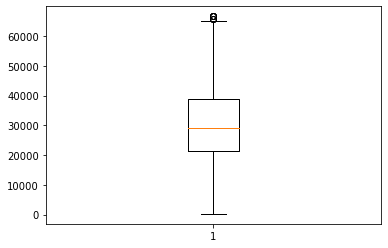

In [69]:
df_test = df_clean.loc[df_clean['Area'] == 'tel-aviv-area']['PPSQM']
plt.boxplot(df_test)
plt.show()